<a href="https://colab.research.google.com/github/Yusufismail/Ismail-s-CV/blob/main/LSTM24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import  drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pickle as pkl
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle as pkl
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape, Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
!pip install gdown
!pip install tensorflow

import gdown
import pickle as pkl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense

# Google Drive file ID and destination path
file_id = '1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL'
destination = 'RML2016.10a_dict.pkl'

# Construct the URL for gdown
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file using gdown
gdown.download(url, destination, quiet=False)

# Define a function to load data from a pickle file
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pkl.load(f, encoding='latin1')
    return data
# Load the data from the downloaded file
file_path = 'RML2016.10a_dict.pkl'
Xd = load_data(file_path)

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

Downloading...
From (original): https://drive.google.com/uc?id=1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL
From (redirected): https://drive.google.com/uc?id=1UAS3HX-LfFWxBvtDIbnuKyW702NuARZL&confirm=t&uuid=c7b25e69-c5b2-41de-974b-a25d79ca7734
To: /content/RML2016.10a_dict.pkl
100%|██████████| 641M/641M [00:07<00:00, 84.5MB/s]


In [ ]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.7)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):

    lyy = list(yy)
    yy1 = np.zeros([len(lyy), len(mods)])
    yy1[np.arange(len(lyy)),lyy] = 1
    return yy1
   # yy1 = np.zeros([len(lyy), 10])
    #yy1[np.arange(len(lyy)),lyy] = 1
    #return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

In [ ]:
## Keras Model
X = np.reshape(X_train, (-1, 2, 128, 1))

train_X, val_X, train_y, val_y = train_test_split(X, Y_train, test_size = 0.3, random_state = 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TimeDistributed, Flatten, Conv2D, Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pickle as pkl
import numpy as np

In [ ]:
lstm_model = Sequential()

lstm_model.add(Conv2D(128, kernel_size=(1, 3), padding = 'same', activation= 'relu', input_shape=(2, 128, 1)))
lstm_model.add(Dropout(0.6))
lstm_model.add(Conv2D(64, kernel_size=(2, 3), padding = 'same', activation= 'relu'))
lstm_model.add(Dropout(0.6))
lstm_model.add(Conv2D(32, kernel_size=(1, 3), padding = 'same', activation= 'relu'))
lstm_model.add(Dropout(0.6))
lstm_model.add(Conv2D(16, kernel_size=(2, 3), padding = 'same', activation= 'relu'))
lstm_model.add(Dropout(0.6))
lstm_model.add(TimeDistributed(Flatten()))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.6))
lstm_model.add(Dense(11, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics = ['accuracy'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 128, 128)       512       
                                                                 
 dropout (Dropout)           (None, 2, 128, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 128, 64)        49216     
                                                                 
 dropout_1 (Dropout)         (None, 2, 128, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 128, 32)        6176      
                                                                 
 dropout_2 (Dropout)         (None, 2, 128, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 128, 16)        3

In [ ]:
history = lstm_model.fit(x=train_X, y=train_y,
          batch_size= 1024, epochs= 50,
          verbose=2,
          validation_data=(val_X, val_y)
)


Epoch 1/50
106/106 - 40s - loss: 2.3969 - accuracy: 0.0938 - val_loss: 2.3787 - val_accuracy: 0.1404 - 40s/epoch - 377ms/step
Epoch 2/50
106/106 - 36s - loss: 2.2149 - accuracy: 0.1817 - val_loss: 2.1810 - val_accuracy: 0.2085 - 36s/epoch - 342ms/step
Epoch 3/50
106/106 - 36s - loss: 2.0351 - accuracy: 0.2371 - val_loss: 1.9482 - val_accuracy: 0.2871 - 36s/epoch - 342ms/step
Epoch 4/50
106/106 - 36s - loss: 1.9286 - accuracy: 0.2756 - val_loss: 1.9458 - val_accuracy: 0.2689 - 36s/epoch - 339ms/step
Epoch 5/50
106/106 - 36s - loss: 1.8268 - accuracy: 0.3172 - val_loss: 1.8044 - val_accuracy: 0.3189 - 36s/epoch - 342ms/step
Epoch 6/50
106/106 - 36s - loss: 1.7124 - accuracy: 0.3589 - val_loss: 1.7030 - val_accuracy: 0.3585 - 36s/epoch - 343ms/step
Epoch 7/50
106/106 - 36s - loss: 1.6415 - accuracy: 0.3842 - val_loss: 1.6411 - val_accuracy: 0.3763 - 36s/epoch - 338ms/step
Epoch 8/50
106/106 - 36s - loss: 1.5883 - accuracy: 0.4019 - val_loss: 1.5047 - val_accuracy: 0.4206 - 36s/epoch - 339

In [ ]:
X_test=X_test.reshape(-1,2,128,1)
score = lstm_model.evaluate(X_test, Y_test,  verbose=0, batch_size=1024)
print('Total overall score => Loss: {:.4f}   Over-All Accuracy: {:.0f}%'.format(score[0],100*score[1]))

Total overall score => Loss: 1.2161   Over-All Accuracy: 53%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

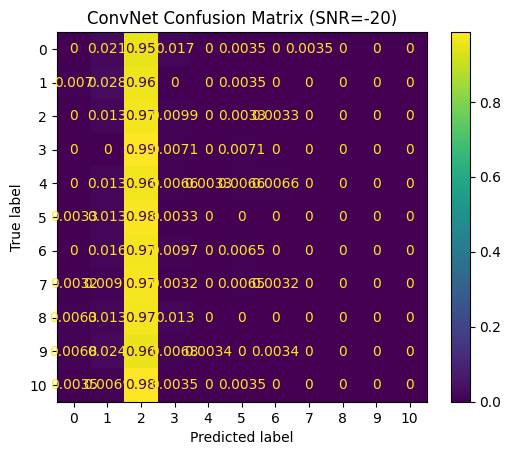

SNR: -20 - Accuracy: 9%   no. of test Signals: 3282 
105/105 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

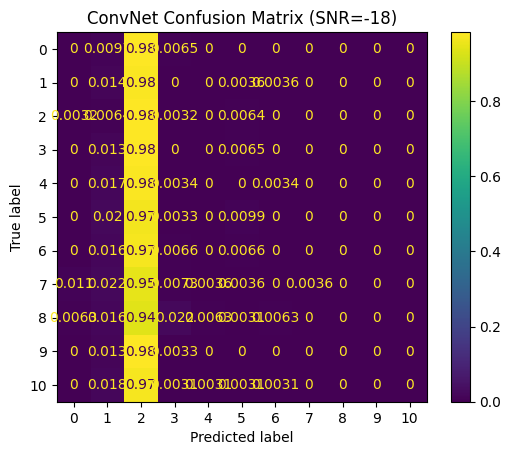

SNR: -18 - Accuracy: 9%   no. of test Signals: 3339 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

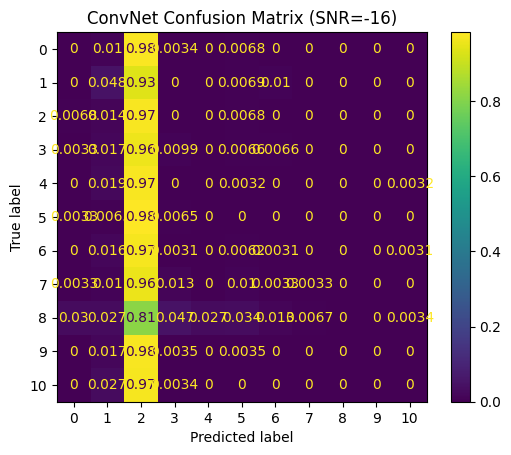

SNR: -16 - Accuracy: 9%   no. of test Signals: 3295 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

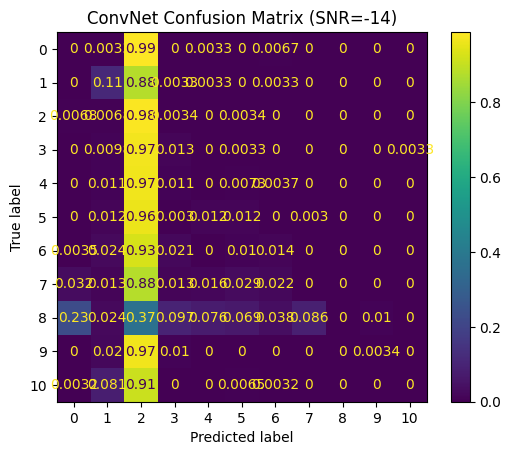

SNR: -14 - Accuracy: 10%   no. of test Signals: 3296 
104/104 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

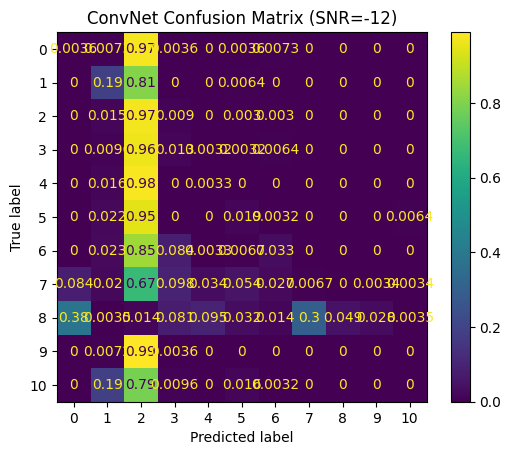

SNR: -12 - Accuracy: 13%   no. of test Signals: 3324 
107/107 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

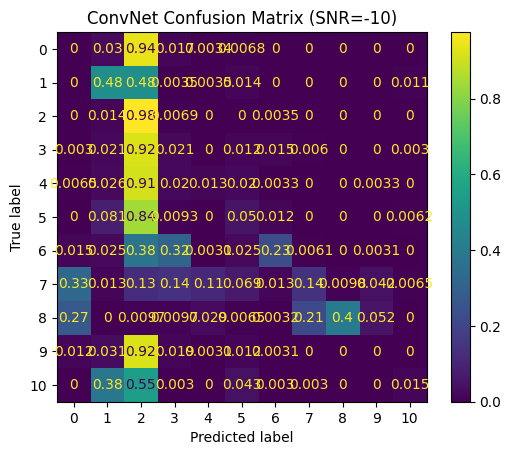

SNR: -10 - Accuracy: 20%   no. of test Signals: 3421 
100/100 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

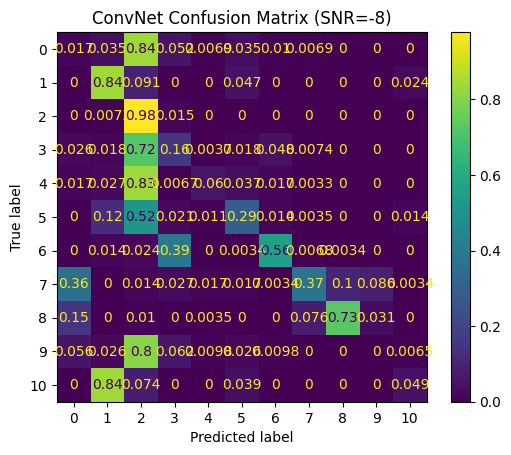

SNR: -8 - Accuracy: 37%   no. of test Signals: 3174 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

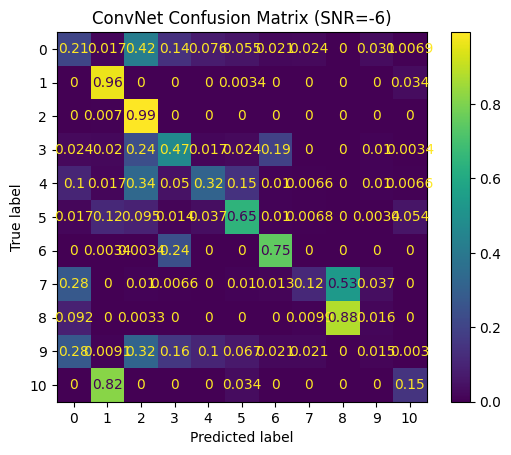

SNR: -6 - Accuracy: 49%   no. of test Signals: 3271 
102/102 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

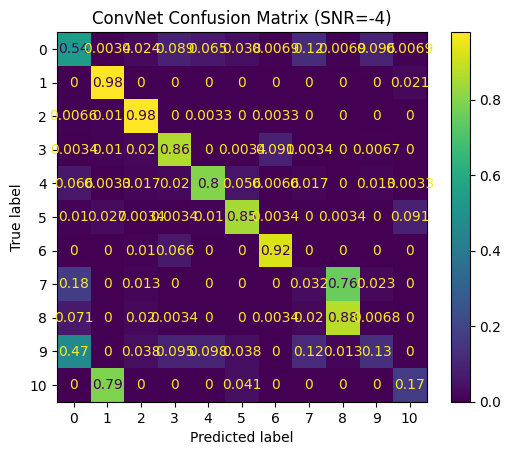

SNR: -4 - Accuracy: 65%   no. of test Signals: 3257 
105/105 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

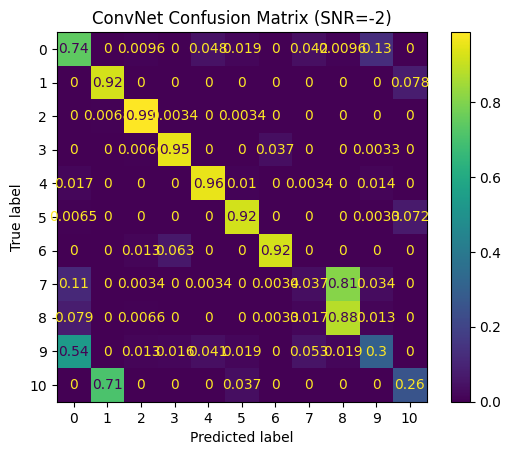

SNR: -2 - Accuracy: 71%   no. of test Signals: 3358 
104/104 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

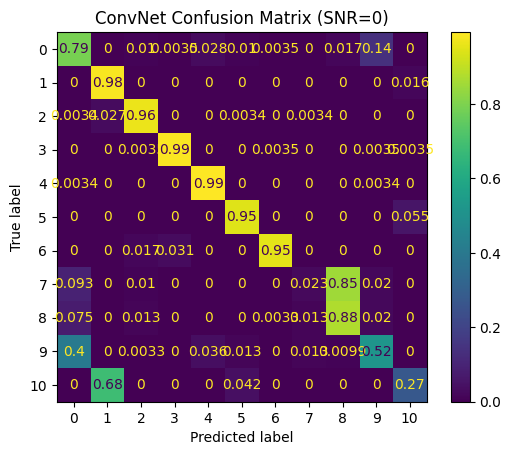

SNR: 0 - Accuracy: 75%   no. of test Signals: 3298 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

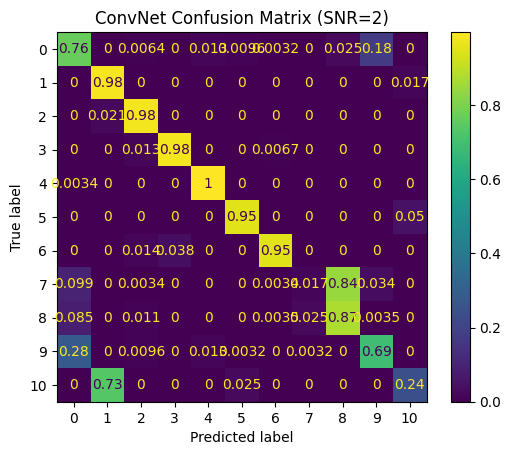

SNR: 2 - Accuracy: 76%   no. of test Signals: 3287 
104/104 [==============================] - 1s 6ms/step


<Figure size 640x480 with 0 Axes>

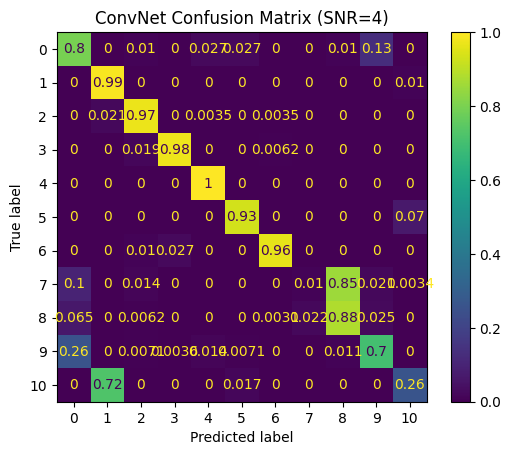

SNR: 4 - Accuracy: 78%   no. of test Signals: 3297 
104/104 [==============================] - 1s 6ms/step


<Figure size 640x480 with 0 Axes>

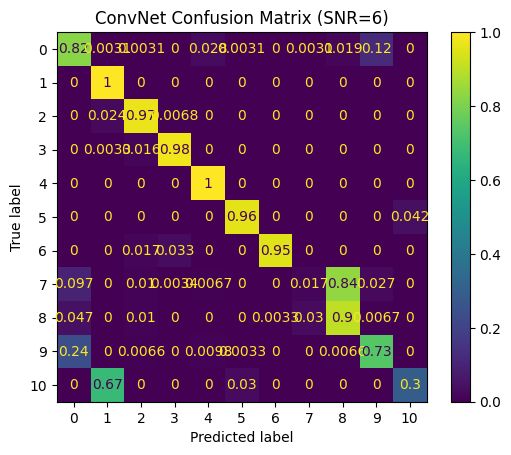

SNR: 6 - Accuracy: 78%   no. of test Signals: 3319 
104/104 [==============================] - 1s 6ms/step


<Figure size 640x480 with 0 Axes>

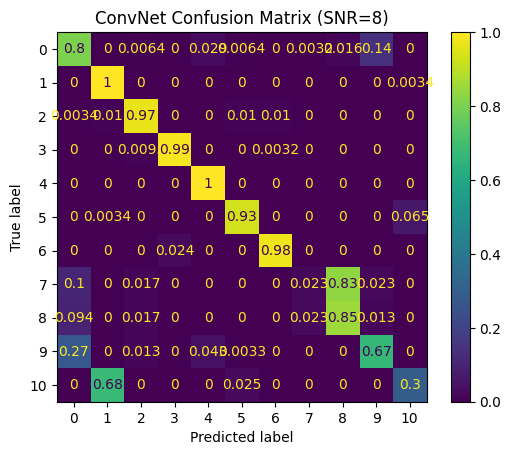

SNR: 8 - Accuracy: 77%   no. of test Signals: 3324 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

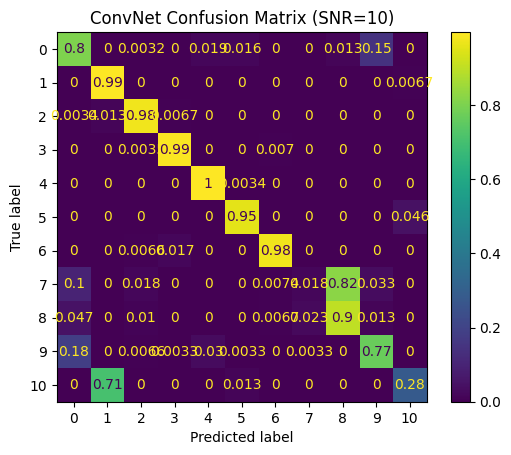

SNR: 10 - Accuracy: 79%   no. of test Signals: 3281 
103/103 [==============================] - 1s 6ms/step


<Figure size 640x480 with 0 Axes>

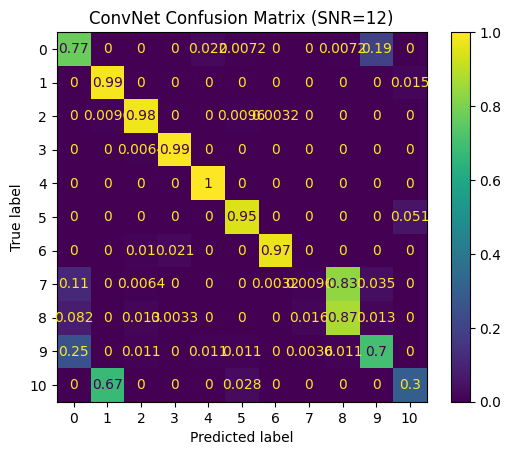

SNR: 12 - Accuracy: 77%   no. of test Signals: 3283 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

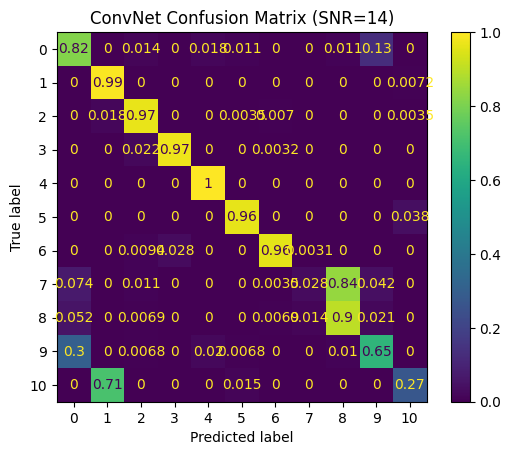

SNR: 14 - Accuracy: 77%   no. of test Signals: 3268 
103/103 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

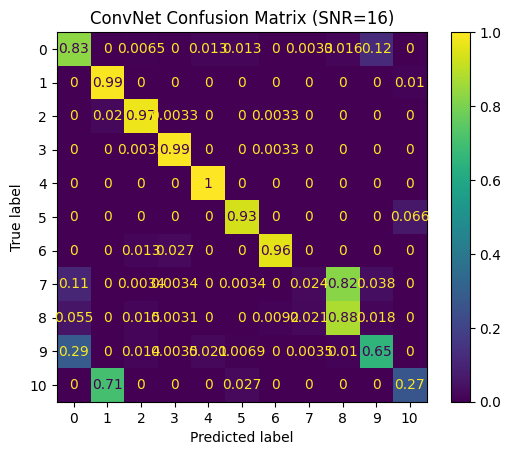

SNR: 16 - Accuracy: 77%   no. of test Signals: 3289 
105/105 [==============================] - 1s 5ms/step


<Figure size 640x480 with 0 Axes>

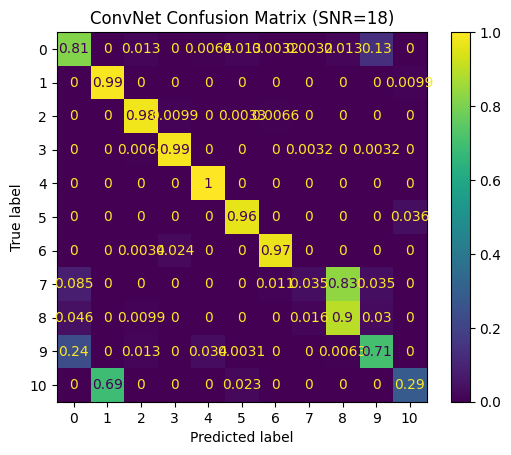

SNR: 18 - Accuracy: 79%   no. of test Signals: 3337 


In [ ]:
# Plot confusion matrix
acc = {}
classes = [0,1,2,3,4,5,6,7,8,9,10]
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]

    test_Y_i= np.array([np.argmax(x) for x in test_Y_i])
    #print(test_Y_i)

    # estimate classes
    # Remove the reshape operation as it is causing the shape mismatch
    # test_X_i = (test_X_i).reshape(test_X_i.shape[0] , 2,128,1)
    test_Y_i_hat =lstm_model.predict(test_X_i)  # Pass the original shape


    #print(test_Y_i_hat)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = test_Y_i[i]
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=confnorm, display_labels=classes)
    disp.plot() # Remove the title argument
    plt.title("ConvNet Confusion Matrix (SNR=%d)"%(snr)) # Set title using plt.title
    plt.show()

    #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))

    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("SNR: {} - Accuracy: {:.0f}%   no. of test Signals: {} ".format(snr ,100* cor / (cor+ncor),test_X_i.shape[0]))
    acc[snr] = 1.0*cor/(cor+ncor)

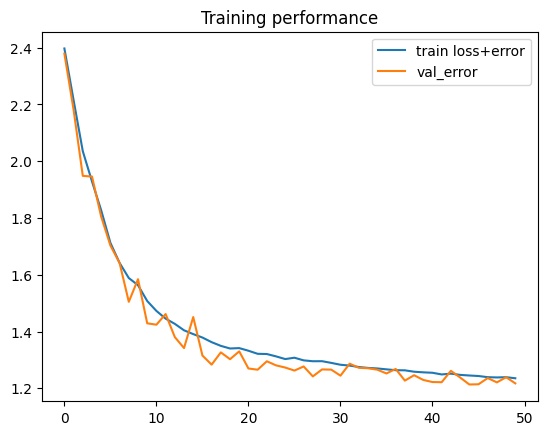

In [ ]:
# Plot training performance

import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()


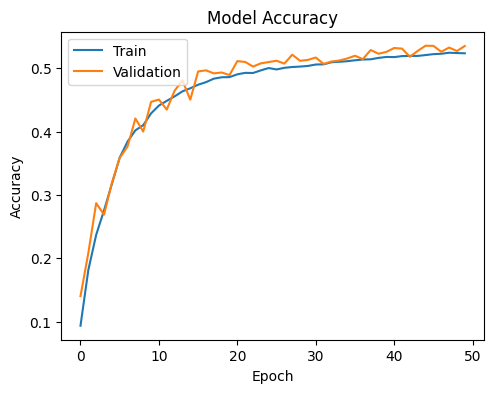

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN1.png')


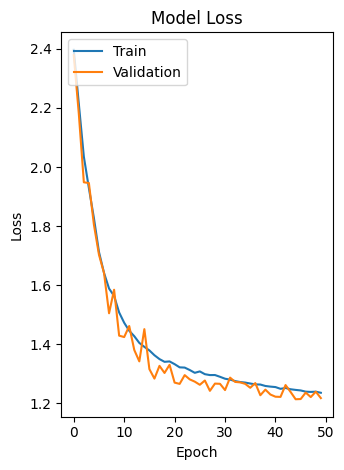

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN1.png')
plt.tight_layout()
plt.show()

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Evaluation Metrics Calculation
# Predict the probabilities and classes
yhat_probs = lstm_model.predict(X_test, verbose=0)
yhat_classes = np.argmax(yhat_probs, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test_classes, yhat_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2882   41 2105   97  121   84   18   63   50  506    4]
 [   2 4255 1505    2    2   25    5    0    0    0   77]
 [  10   78 5791   23    2   17   14    1    0    0    1]
 [  17   37 2082 3744    7   25  127    6    0    8    4]
 [  65   45 2083   35 3618   87   15    9    0   13    4]
 [  12  127 1946   19   21 3658   13    4    1    2  227]
 [   6   42 1592  445    2   20 3886    5    1    1    1]
 [ 702   26 1399   94   57   61   35  272 3117  157    5]
 [ 586   25 1007   82   69   42   35  276 3820   97    2]
 [1246   45 2111  124  153   71   12   69   29 2176    3]
 [   2 3327 1608    7    1  144    4    1    0    0 1058]]


In [ ]:
# Calculate and print additional metrics
accuracy = accuracy_score(Y_test_classes, yhat_classes)
precision = precision_score(Y_test_classes, yhat_classes, average='weighted')
recall = recall_score(Y_test_classes, yhat_classes, average='weighted')
f1 = f1_score(Y_test_classes, yhat_classes, average='weighted')
kappa = cohen_kappa_score(Y_test_classes, yhat_classes)
roc_auc = roc_auc_score(Y_test, yhat_probs, multi_class='ovr')

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.5327
Precision: 0.6576
Recall: 0.5327
F1 Score: 0.5308
Cohen's Kappa: 0.4862
ROC AUC: 0.9092


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
classification_report(Y_test_classes, yhat_classes) # Pass the predicted class labels instead of probabilities

'              precision    recall  f1-score   support\n\n           0       0.52      0.48      0.50      5971\n           1       0.53      0.72      0.61      5873\n           2       0.25      0.98      0.40      5937\n           3       0.80      0.62      0.70      6057\n           4       0.89      0.61      0.72      5974\n           5       0.86      0.61      0.71      6030\n           6       0.93      0.65      0.76      6001\n           7       0.39      0.05      0.08      5925\n           8       0.54      0.63      0.59      6041\n           9       0.74      0.36      0.48      6039\n          10       0.76      0.17      0.28      6152\n\n    accuracy                           0.53     66000\n   macro avg       0.66      0.53      0.53     66000\nweighted avg       0.66      0.53      0.53     66000\n'